In [154]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable

import torchvision
from torchvision import transforms, datasets

import os
from utils import Logger

In [155]:
# options

# dataset = 'mnist'
# dataset = 'cifar10'
dataset = 'stl10'

normalizing_mean = 0.5
normalizing_std = 0.5

batch_size = 64   # input batch size for training
out_dir = './dataset'

In [156]:
def get_dataset(name, split='train', transform=None,
                target_transform=None, download=True, datasets_path=out_dir):
    train = (split == 'train')
    root = os.path.join(datasets_path, name)
    
    if name == 'mnist':
        data_transform = transforms.Compose([
            transforms.Resize(32),
            transforms.ToTensor(),
            transforms.Normalize((normalizing_mean,), (normalizing_std,))
        ])
        return datasets.MNIST(root=root,
                              train=train,
                              transform=data_transform,
                              target_transform=target_transform,
                              download=download)
    
    elif name == 'cifar10':
        data_transform = transforms.Compose([
            transforms.Resize(32),
            transforms.ToTensor(),
            transforms.Normalize((normalizing_mean, normalizing_mean, normalizing_mean),
                                 (normalizing_std, normalizing_std, normalizing_std)),
        ])
        return datasets.CIFAR10(root=root,
                                train=train,
                                transform=data_transform,
                                target_transform=target_transform,
                                download=download)
    
    elif name == 'stl10':
        data_transform = transforms.Compose([
            transforms.Resize(32),
            transforms.ToTensor(),
            transforms.Normalize((normalizing_mean, normalizing_mean, normalizing_mean),
                                 (normalizing_std, normalizing_std, normalizing_std)),
        ])
        return datasets.STL10(root=root,
                              split=split,
                              transform=data_transform,
                              target_transform=target_transform,
                              download=download)

In [160]:
# load data
trainset = get_dataset(dataset, split='train')
testset = get_dataset(dataset, split='test')

# create loader with data, so that we can iterate over it
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [158]:
print(trainset[0][0].shape)

torch.Size([3, 32, 32])


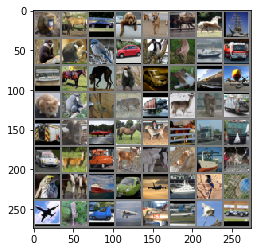

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img * normalizing_std + normalizing_mean     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))